In [1]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

In [19]:
df = pd.read_csv("./Datasets/tutorial.csv")

In [23]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
def preprocess_text(text):
    # Lowercasing
    text = text.lower()
    # Removing special characters & numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenization
    words = word_tokenize(text)
    # Stopword Removal
    words = [word for word in words if word not in stopwords.words('english')]
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    return " ".join(words)

[nltk_data] Downloading package punkt to C:\Users\Andrian
[nltk_data]     Ang\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Andrian
[nltk_data]     Ang\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Andrian
[nltk_data]     Ang\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [26]:
from tqdm import tqdm

tqdm.pandas()
df['review_preprocessed'] = df['review'].progress_apply(preprocess_text)
corpus = df.review_preprocessed
corpus

100%|██████████| 4321/4321 [04:37<00:00, 15.59it/s]


0       fantastic spot even quite cocktail swell host ...
1       love love love calamari good spicy endless lis...
2       love place stiff martini cocktail cheap drink ...
3       everything great cocktail bar great location a...
4       came pirate game around ish evening gotten luc...
                              ...                        
4316    wife caught show golden nugget heard good thin...
4317    dumbest show ever seen never laughed minute re...
4318    girlfriend went show absolutely terriblenot fu...
4319    restroom looked like bombardment improvised sh...
4320    going pennsylvania macaroni company year love ...
Name: review_preprocessed, Length: 4321, dtype: object

### Bag of Words (BoW)

In [27]:
vectorizer = CountVectorizer()
X_bow = vectorizer.fit_transform(corpus)
pd.DataFrame(X_bow.toarray(), columns=vectorizer.get_feature_names_out())

,aa,aaa,aaaaaaeeeeei,aaaoh,aand,aarp,aat,ab,aback,abalone,...,zookeeper,zoomed,zorbas,zorfs,zoya,zucchini,zumba,zyr,zz,zzang
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4316,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4317,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4318,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4319,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### TF-IDF (Term Frequency - Inverse Document Frequency)

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer_tfidf = TfidfVectorizer()
X_tfidf = vectorizer_tfidf.fit_transform(corpus)
pd.DataFrame(X_tfidf.toarray(), columns=vectorizer_tfidf.get_feature_names_out())

,aa,aaa,aaaaaaeeeeei,aaaoh,aand,aarp,aat,ab,aback,abalone,...,zookeeper,zoomed,zorbas,zorfs,zoya,zucchini,zumba,zyr,zz,zzang
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4316,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4317,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4318,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4319,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Distribusi Frekuensi Kata

[nltk_data] Downloading package punkt to C:\Users\Andrian
[nltk_data]     Ang\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


[('place', 2953), ('time', 2060), ('one', 1892), ('like', 1872), ('great', 1855), ('get', 1816), ('go', 1529), ('good', 1488), ('food', 1462), ('would', 1338)]


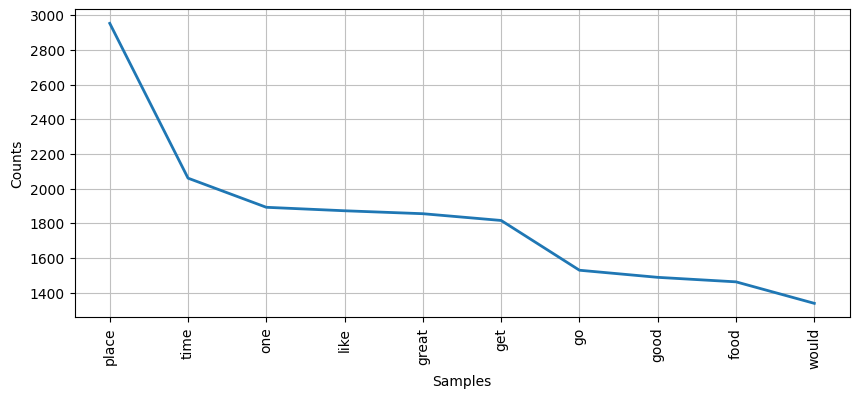

In [29]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import matplotlib.pyplot as plt

nltk.download('punkt')

all_words = word_tokenize(" ".join(corpus).lower())
freq_dist = FreqDist(all_words)
print(freq_dist.most_common(10))

plt.figure(figsize=(10, 4))
freq_dist.plot(10, cumulative=False)
plt.show()

### N-grams

In [30]:
from nltk.util import ngrams

def generate_ngrams(text, n):
    words = word_tokenize(text.lower())
    return list(ngrams(words, n))

bigrams = generate_ngrams(" ".join(corpus), 2)
trigrams = generate_ngrams(" ".join(corpus), 3)

print("Contoh Bigrams:", bigrams[:5])
print("Contoh Trigrams:", trigrams[:5])

Contoh Bigrams: [('fantastic', 'spot'), ('spot', 'even'), ('even', 'quite'), ('quite', 'cocktail'), ('cocktail', 'swell')]
Contoh Trigrams: [('fantastic', 'spot', 'even'), ('spot', 'even', 'quite'), ('even', 'quite', 'cocktail'), ('quite', 'cocktail', 'swell'), ('cocktail', 'swell', 'host')]


### Word Embeddings (Word2Vec)


In [32]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize

# Pastikan corpus dalam bentuk list
tokenized_corpus = corpus.astype(str).apply(lambda x: word_tokenize(x.lower())).tolist()

# Melatih model Word2Vec
word2vec_model = Word2Vec(sentences=tokenized_corpus, vector_size=10, window=2, min_count=1, workers=4)

# Cek vektor untuk kata tertentu
word = "fantastic"
if word in word2vec_model.wv:
    print(f"Vektor Word2Vec untuk '{word}':\n", word2vec_model.wv[word])
else:
    print(f"Kata '{word}' tidak ditemukan dalam model.")


Vektor Word2Vec untuk 'fantastic':
 [ 0.19104324 -0.99059635  0.8956566  -0.25381005  0.68136203 -0.09194248
  2.06519     1.1663593  -2.0447915  -1.3800839 ]
